### To analyze which projects struggle to get funded and why.

In [2]:
import pandas as pd


import matplotlib.pyplot as plt


df = pd.read_csv("../data/Preprocessed_DonorsChoose_dataset 2.csv")
df.head()

id teacher_prefix school_state project_grade_category  \
0  p253737            mrs           in          grades_prek_2   
1  p258326             mr           fl             grades_6_8   
2  p182444             ms           az             grades_6_8   
3  p246581            mrs           ky          grades_prek_2   
4  p104768            mrs           tx          grades_prek_2   

       project_subject_categories project_subject_subcategories  \
0               literacy_language                  esl_literacy   
1    history_civics_health_sports  civics_government_teamsports   
2                   health_sports    health_wellness_teamsports   
3  literacy_language_math_science          literacy_mathematics   
4                    math_science                   mathematics   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             0                    0  154.60   
1                                             7                    1  299.00   
2                                             1                    0  516.85   
3                                             4                    1  232.90   
4                                             1                    1   67.98   

   quantity                                   cleaned_titles  \
0        23        educational support english learners home   
1         1                 wanted projector hungry learners   
2        22  soccer equipment awesome middle school students   
3         4                           techie kindergarteners   
4         4                           interactive math tools   

                                      cleaned_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   
2  true champions not always ones win guts mia ha...   
3  work unique school filled esl english second l...   
4  second grade classroom next year made around 2...   

                                     cleaned_summary  isdigit_summary  
0  students_need_opportunities_practice_beginning...                0  
1  students_need_projector_help_viewing_education...                0  
2  students_need_shine_guards_athletic_socks_socc...                0  
3  students_need_engage_reading_math_way_inspire_...                0  
4  students_need_hands_practice_mathematics_fun_p...                0

In [3]:
import numpy as np

### Data Preprocessing 

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   school_state                                  109248 non-null  object 
 3   project_grade_category                        109248 non-null  object 
 4   project_subject_categories                    109248 non-null  object 
 5   project_subject_subcategories                 109248 non-null  object 
 6   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 7   project_is_approved                           109248 non-null  int64  
 8   price                                         109248 non-null  float64
 9   quantity                                      10

In [5]:
df.isnull().sum()

id                                               0
teacher_prefix                                   0
school_state                                     0
project_grade_category                           0
project_subject_categories                       0
project_subject_subcategories                    0
teacher_number_of_previously_posted_projects     0
project_is_approved                              0
price                                            0
quantity                                         0
cleaned_titles                                  43
cleaned_essays                                   0
cleaned_summary                                  0
isdigit_summary                                  0
dtype: int64

In [6]:
df_og = df.copy

In [7]:
df["cleaned_titles"] = df["cleaned_titles"].fillna("unknown")


In [8]:
df.cleaned_titles.info

<bound method Series.info of 0                 educational support english learners home
1                          wanted projector hungry learners
2           soccer equipment awesome middle school students
3                                    techie kindergarteners
4                                    interactive math tools
                                ...                        
109243    privacy shields help promote independent thinking
109244                                 technology classroom
109245                      2016 2017 beginning year basics
109246                 flexible seating inclusive classroom
109247          classroom tech develop 21st century leaders
Name: cleaned_titles, Length: 109248, dtype: object>

In [9]:
df.isnull().sum()

id                                              0
teacher_prefix                                  0
school_state                                    0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
price                                           0
quantity                                        0
cleaned_titles                                  0
cleaned_essays                                  0
cleaned_summary                                 0
isdigit_summary                                 0
dtype: int64

In [10]:
df.duplicated().any()

np.False_

In [11]:
col = ["teacher_prefix"	 , "school_state"	, "project_grade_category" ,	"project_subject_categories" ,	"project_subject_subcategories" ,		"cleaned_titles" ,	"cleaned_essays" ,	"cleaned_summary"]
df[col] = df[col].apply(lambda x : x.str.strip())

In [12]:
col = ["teacher_prefix"	 , "school_state"	, "project_grade_category" ,	"project_subject_categories" ,	"project_subject_subcategories" ,		"cleaned_titles" ,	"cleaned_essays" ,	"cleaned_summary"]
df[col] = df[col].apply(lambda x : x.str.lower())

In [13]:
df["project_grade_category"].value_counts().head(10)

project_grade_category
grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: count, dtype: int64

In [14]:
df["project_grade_category"].str.len().describe()

count    109248.000000
mean         11.314788
std           1.419513
min          10.000000
25%          10.000000
50%          11.000000
75%          13.000000
max          13.000000
Name: project_grade_category, dtype: float64

In [15]:
df.shape

(109248, 14)

### EDA 

### Approval rate 

In [52]:
import pandas as pd
import plotly.express as px
import os

approval_rate = (
    df["project_is_approved"]
        .value_counts(normalize=True)
        .rename({1: "Approved", 0: "Not Approved"})
        .reset_index()
)

approval_rate.columns = ["Status", "Proportion"]

fig = px.bar(
    approval_rate,
    x="Status",
    y="Proportion",
    color="Status",
    text=approval_rate["Proportion"].apply(lambda x: f"{x*100:.1f}%"),
    title="Overall Project Approval Rate",
    color_discrete_map={
        "Approved": "#2ecc71",
        "Not Approved": "#e74c3c"
    }
)

fig.update_layout(
    yaxis_title="Proportion of Projects",
    xaxis_title="",
    height=500  # 👈 increase plot height
)

# thinner + highlighted bars
fig.update_traces(
    textposition="outside",
    width=0.4,
    marker=dict(
        line=dict(color="black", width=1.5)
    )
)

os.makedirs("../visuals", exist_ok=True)
fig.write_html("../visuals/overall_approval_rate.html")

fig.show(renderer="vscode")


In [18]:
df['project_is_approved'].value_counts(normalize=True)

project_is_approved
1    0.848583
0    0.151417
Name: proportion, dtype: float64

In [19]:
df.groupby('project_subject_categories')['project_is_approved'].mean().sort_values()


project_subject_categories
history_civics_warmth_care_hunger       0.000000
music_arts_warmth_care_hunger           0.500000
math_science_warmth_care_hunger         0.545455
music_arts_health_sports                0.684211
music_arts_appliedlearning              0.700000
music_arts_history_civics               0.722222
literacy_language_warmth_care_hunger    0.777778
specialneeds_warmth_care_hunger         0.782609
history_civics_appliedlearning          0.785714
specialneeds_health_sports              0.785714
math_science_health_sports              0.787440
appliedlearning_warmth_care_hunger      0.800000
literacy_language_health_sports         0.805556
health_sports_music_arts                0.806452
appliedlearning_music_arts              0.807388
specialneeds                            0.811879
appliedlearning_math_science            0.812738
history_civics_specialneeds             0.813492
appliedlearning_specialneeds            0.814588
appliedlearning                         0.

Not all project types are treated equally on DonorsChoose.
Some subject combinations have very low approval rates, while others are consistently successful.

#### Approval rate by subject category 

In [20]:
subject_approval = (
    df.groupby("project_subject_categories")["project_is_approved"]
      .mean()
      .sort_values(ascending=False)
)


In [21]:
import plotly.express as px
import os

fig = px.bar(
    x=subject_approval.index,
    y=subject_approval.values,
    labels={
        "x": "Subject Category",
        "y": "Approval Rate"
    },
    title="Approval Rate Subject Categories"
)

fig.update_layout(
    width=800,
    height=600,
    bargap=0.1
)

os.makedirs("../visuals", exist_ok=True)
fig.write_html("../visuals/approval_rate_subject_categories.html")

fig.show(renderer="vscode")


In [22]:
grade_approval = df.groupby('project_grade_category')['project_is_approved'].mean().sort_values()
grade_approval


project_grade_category
grades_9_12      0.837636
grades_6_8       0.842522
grades_prek_2    0.848751
grades_3_5       0.854377
Name: project_is_approved, dtype: float64

### Approval rate by gender 

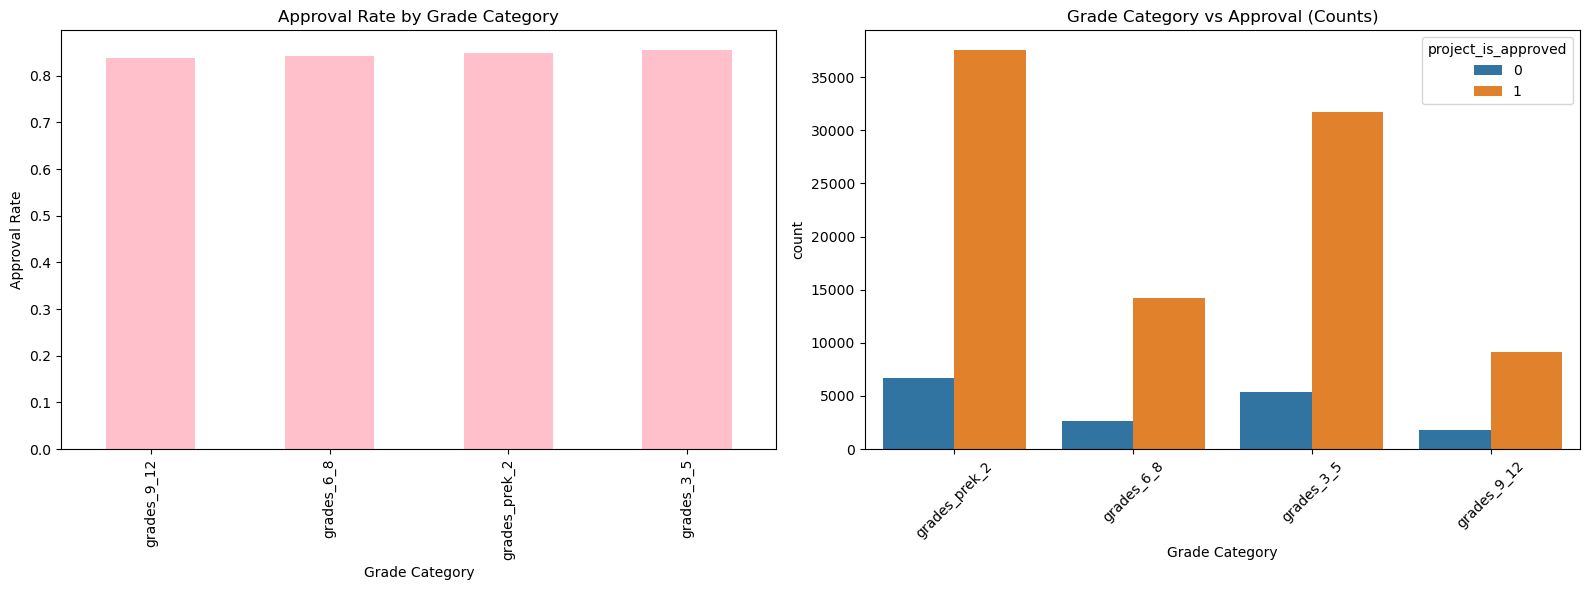

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16,6))


grade_approval.plot(kind='bar', ax=axes[0], color='pink')
axes[0].set_title("Approval Rate by Grade Category")
axes[0].set_ylabel("Approval Rate")
axes[0].set_xlabel("Grade Category")


sns.countplot(data=df, x="project_grade_category", hue="project_is_approved", ax=axes[1])
axes[1].set_title("Grade Category vs Approval (Counts)")
axes[1].set_xlabel("Grade Category")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Approval rate across grade

In [24]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


pio.renderers.default = "vscode"


grade_pct = (
    df.groupby("project_grade_category")["project_is_approved"]
      .value_counts(normalize=True)
      .rename("percentage")
      .mul(100)
      .reset_index()
)

grade_pct["approval_label"] = grade_pct["project_is_approved"].map({
    0: "Not Approved",
    1: "Approved"
})



grade_line = (
    df.groupby("project_grade_category")["project_is_approved"]
      .mean()
      .reset_index()
)

grade_order = [
    "grades_prek_2",
    "grades_3_5",
    "grades_6_8",
    "grades_9_12"
]

grade_line["project_grade_category"] = pd.Categorical(
    grade_line["project_grade_category"],
    categories=grade_order,
    ordered=True
)

grade_line = grade_line.sort_values("project_grade_category")

grade_pct["project_grade_category"] = pd.Categorical(
    grade_pct["project_grade_category"],
    categories=grade_order,
    ordered=True
)

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        "Grade Category vs Approval (Percentage)",
        "Approval Rate Trend Across Grade Levels"
    )
)



bar_fig = px.bar(
    grade_pct,
    x="project_grade_category",
    y="percentage",
    color="approval_label",
    color_discrete_map={
        "Approved": "#2ecc71",
        "Not Approved": "#e74c3c"
    }
)

for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)



line_fig = px.line(
    grade_line,
    x="project_grade_category",
    y="project_is_approved",
    markers=True
)

line_fig.update_traces(
    line=dict(width=3, color="#3498db"),
    marker=dict(size=8)
)

for trace in line_fig.data:
    fig.add_trace(trace, row=1, col=2)


fig.update_layout(
    height=500,
    width=1000,
    showlegend=True,
    margin=dict(t=80, b=40)
)

fig.update_xaxes(title_text="Grade Category", tickangle=45, row=1, col=1)
fig.update_yaxes(title_text="Percentage of Projects", row=1, col=1)

fig.update_xaxes(title_text="Grade Category", tickangle=45, row=1, col=2)
fig.update_yaxes(title_text="Approval Rate", row=1, col=2)



fig.add_shape(
    type="line",
    x0=0.5, x1=0.5,
    y0= -0.5, y1=1.5,
    xref="paper",
    yref="paper",
    line=dict(color="gray", width=2)
)


fig.write_html("../visuals/grade_vs_approval_and_trend.html")



fig.show()




Projects for lower grade levels (Grades 3–5 and PreK–2) have slightly higher approval rates compared to projects for higher grades (6–8 and 9–12).
This suggests that donors may be more inclined to support projects aimed at younger students.


### Approval rate across states 

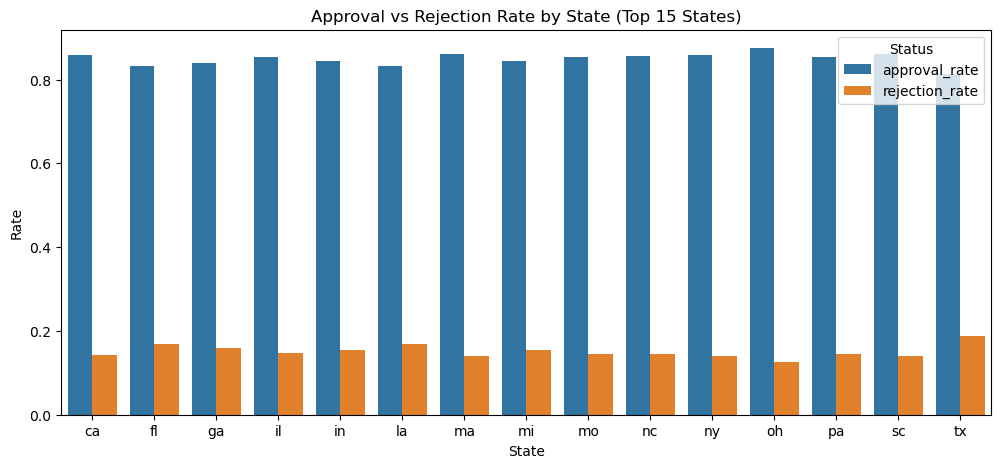

In [25]:
state_rates = (
    df.groupby("school_state")["project_is_approved"]
      .agg(
          approval_rate="mean",
          total_projects="count"
      )
      .reset_index()
)

state_rates["rejection_rate"] = 1 - state_rates["approval_rate"]
top_states = df["school_state"].value_counts().head(15).index
state_rates_top = state_rates[state_rates["school_state"].isin(top_states)]
state_melted = state_rates_top.melt(
    id_vars="school_state",
    value_vars=["approval_rate", "rejection_rate"],
    var_name="Status",
    value_name="Rate"
)

plt.figure(figsize=(12,5))
sns.barplot(data=state_melted, x="school_state", y="Rate", hue="Status")
plt.title("Approval vs Rejection Rate by State (Top 15 States)")
plt.ylabel("Rate")
plt.xlabel("State")
plt.show()


In [26]:
state_sorted = state_rates_top.sort_values("approval_rate")

fig = px.line(state_sorted,
              x="school_state",
              y="approval_rate",
              markers=True,
              title="Approval Rate by State (Sorted)")
fig.show()



In [27]:
import plotly.express as px
from plotly.subplots import make_subplots

# ---- Prepare data ----
state_sorted = state_rates_top.sort_values("approval_rate")

# ---- Create subplots with spacing ----
fig = make_subplots(
    rows=1,
    cols=2,
    column_widths=[0.55, 0.45],   # 👈 controls spacing
    horizontal_spacing=0.12,      # 👈 space between plots
    subplot_titles=(
        "Approval vs Rejection Rate by State (Top 15)",
        "Approval Rate by State (Sorted)"
    )
)

# ---- Plot 1: Grouped bar ----
fig_bar = px.bar(
    state_melted,
    x="school_state",
    y="Rate",
    color="Status",
    barmode="group",
    color_discrete_map={
        "approval_rate": "#2ecc71",
        "rejection_rate": "#e74c3c"
    }
)

for trace in fig_bar.data:
    fig.add_trace(trace, row=1, col=1)

# ---- Plot 2: Line plot ----
fig_line = px.line(
    state_sorted,
    x="school_state",
    y="approval_rate",
    markers=True
)

for trace in fig_line.data:
    fig.add_trace(trace, row=1, col=2)

# ---- Vertical separator line (Plotly way) ----


# ---- Layout ----
fig.update_layout(
    title=dict(
        text="State-wise Project Approval Analysis",
        x=0.5,              # 👈 center horizontally
        xanchor="center",   # 👈 anchor from center
        font=dict(size=20)
    ),
    xaxis_tickangle=45,
    xaxis2_tickangle=45,
    showlegend=True,
    margin=dict(t=80, b=40)
)
fig.write_html("../visuals/state_vs_approval_and_trend.html")


fig.show()


The analysis reveals noticeable variation in project approval rates across different states. While approval rates remain generally high nationwide, some states consistently outperform others.

For example, Ohio and Massachusetts exhibit the highest approval rates, whereas Texas and Louisiana appear at the lower end of the spectrum. Although the absolute differences may seem modest, they translate into thousands of projects when scaled nationally.

This suggests that regional factors—such as donor concentration, state-level educational policies, or local awareness of the platform—may influence the likelihood of project approval.

### Project price v/s Approval

In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


pio.renderers.default = "vscode"   


df["price_bin"] = pd.qcut(df["price"], q=10)

price_trend = (
    df.groupby("price_bin")["project_is_approved"]
      .mean()
      .reset_index()
)

price_trend["price_bin"] = price_trend["price_bin"].astype(str)


fig = make_subplots(
    rows=1,
    cols=2,
    column_widths=[0.55, 0.45],
    horizontal_spacing=0.12,
    subplot_titles=(
        "Distribution of Project Cost by Approval Status",
        "Approval Rate Across Price Ranges"
    )
)


fig_violin = px.violin(
    df,
    x="project_is_approved",
    y="price",
    color="project_is_approved",
    box=True,
    points="all",
    color_discrete_map={
        0: "#e74c3c",
        1: "#2ecc71"
    }
)

for trace in fig_violin.data:
    fig.add_trace(trace, row=1, col=1)


fig_line = px.line(
    price_trend,
    x="price_bin",
    y="project_is_approved",
    markers=True
)

fig_line.update_traces(
    line=dict(color="#2ecc71", width=3),
    marker=dict(color="#2ecc71", size=8)
)

for trace in fig_line.data:
    fig.add_trace(trace, row=1, col=2)


fig.update_layout(
    title=dict(
        text="Price and Project Approval Analysis",
        x=0.5,
        xanchor="center",
        font=dict(size=20)
    ),
    xaxis_title="Approval Status (0 = Not Approved, 1 = Approved)",
    yaxis_title="Price",
    xaxis2_tickangle=45,
    yaxis2_title="Approval Rate",
    height=500,
    showlegend=True,
    margin=dict(t=80, b=40)
)


fig.write_html("../visuals/price_and_project_approval_analysis.html")


fig.show()


/var/folders/ck/z5x0f87n51g0pn_yrg4gyyp80000gn/T/ipykernel_6518/350739926.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




While some high-cost projects do receive approval, the likelihood of approval declines as project cost increases. Most approved projects are concentrated in lower price ranges, indicating that cost efficiency significantly improves approval probability

### Approval experience v/s Teachers experience 

In [29]:
import pandas as pd
import plotly.express as px
import plotly.io as pio


pio.renderers.default = "vscode"

df["exp_bin"] = pd.qcut(
    df["teacher_number_of_previously_posted_projects"],
    q=10,
    duplicates="drop"
)

exp_trend = (
    df.groupby("exp_bin")["project_is_approved"]
      .mean()
      .reset_index()
)


experience_levels = [
    "Very Low",
    "Low",
    "Lower-Mid",
    "Mid",
    "Upper-Mid",
    "High",
    "Very High",
    "Expert",
    "Highly Expert",
    "Extreme"
]

exp_trend["experience_level"] = experience_levels[:len(exp_trend)]


fig = px.line(
    exp_trend,
    x="experience_level",
    y="project_is_approved",
    markers=True,
    title="Approval Rate Across Teacher Experience Levels",
    labels={
        "experience_level": "Teacher Experience Level",
        "project_is_approved": "Approval Rate"
    }
)

fig.update_layout(
    width=800,
    height=500
)


fig.write_html("../visuals/approval_rate_teacher_experience.html")

fig.show()


/var/folders/ck/z5x0f87n51g0pn_yrg4gyyp80000gn/T/ipykernel_6518/1602571151.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.





Projects submitted by more experienced teachers have a higher likelihood of approval.
New teachers face slightly lower approval rates, while highly experienced teachers consistently achieve high approval.
This suggests that familiarity with the platform and proposal-writing skills play an important role in project success.


### Approval rate by teacher gender 

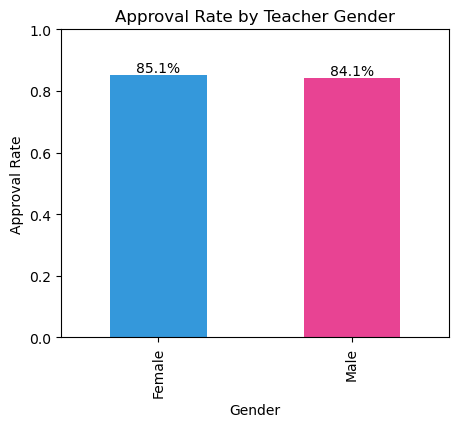

In [30]:
import matplotlib.pyplot as plt


df["teacher_gender"] = df["teacher_prefix"].map({
    "mr": "Male",
    "mrs": "Female",
    "ms": "Female"
})


gender_approval = df.groupby("teacher_gender")["project_is_approved"].mean()


plt.figure(figsize=(5,4))
ax = gender_approval.plot(kind="bar", color=["#3498db", "#e84393"])

plt.title("Approval Rate by Teacher Gender")
plt.ylabel("Approval Rate")
plt.xlabel("Gender")
plt.ylim(0,1)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height*100:.1f}%",
        (p.get_x() + p.get_width() / 2., height),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()


Approval rates across teacher gender show only marginal differences, suggesting that DonorsChoose approval decisions are largely gender-neutral. This indicates fairness in the funding process with respect to teacher gender.

#### Relationship Between Project Features and Approval Outcome

In [31]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

 
pio.renderers.default = "vscode"


 

df["price_bin"] = pd.qcut(df["price"], q=10)

price_trend = (
    df.groupby(["price_bin", "project_grade_category"])["project_is_approved"]
      .mean()
      .reset_index()
)

price_trend["price_bin"] = price_trend["price_bin"].astype(str)

 

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        "Project Cost Distribution by Grade and Approval Status",
        "Approval Rate Across Price Ranges by Grade"
    )
)
 

fig_box = px.box(
    df,
    x="project_grade_category",
    y="price",
    color="project_is_approved"
)

for trace in fig_box.data:
    fig.add_trace(trace, row=1, col=1)

 

fig_line = px.line(
    price_trend,
    x="price_bin",
    y="project_is_approved",
    color="project_grade_category",
    markers=True
)

for trace in fig_line.data:
    fig.add_trace(trace, row=1, col=2)



fig.update_layout(
    title=dict(
        text="Project Cost and Approval Trends by Grade",
        x=0.5,
        xanchor="center",
        font=dict(size=20)
    ),
    xaxis_tickangle=45,
    xaxis2_tickangle=45,
    yaxis_title="Project Cost",
    yaxis2_title="Approval Rate",
    height=500,
    showlegend=True
)


fig.write_html("../visuals/project_cost_and_approval_by_grade.html")


fig.show()


/var/folders/ck/z5x0f87n51g0pn_yrg4gyyp80000gn/T/ipykernel_6518/2306317058.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Across all grade categories, project approval rates decrease as project cost increases. While most projects are low-cost and approval patterns overlap across grades, higher-cost proposals consistently show lower approval likelihood. This suggests that project price is a strong and consistent factor influencing approval decisions, regardless of grade level.

### Price  + Teacher experience v/s approval

In [32]:
import pandas as pd
import plotly.express as px
import plotly.io as pio


pio.renderers.default = "vscode"


df["experience_level"] = pd.cut(
    df["teacher_number_of_previously_posted_projects"],
    bins=[-1, 0, 5, 20, 50, 100, 500],
    labels=["New", "Low", "Medium", "High", "Very High", "Expert"]
)


df["price_bin"] = pd.qcut(
    df["price"],
    q=10,
    duplicates="drop"
)

heatmap_data = (
    df.groupby(["experience_level", "price_bin"], observed=True)["project_is_approved"]
      .mean()
      .reset_index()
)


heatmap_data["experience_level"] = heatmap_data["experience_level"].astype(str)
heatmap_data["price_bin"] = heatmap_data["price_bin"].astype(str)


fig = px.density_heatmap(
    heatmap_data,
    x="experience_level",
    y="price_bin",
    z="project_is_approved",
    color_continuous_scale="Viridis",
    title="Approval Rate Across Teacher Experience Level and Project Cost",
    labels={
        "experience_level": "Teacher Experience Level",
        "price_bin": "Project Cost Range",
        "project_is_approved": "Approval Rate"
    }
)

fig.update_layout(xaxis_tickangle=0)

fig.write_html("../visuals/approval_rate_experience_level_vs_price_heatmap.html")


fig.show()


Approval rates are highest for low-cost projects across all experience levels, indicating that project cost plays a more influential role than teacher experience in determining approval outcomes.

In [33]:
df["experience_level"] = pd.cut(
    df["teacher_number_of_previously_posted_projects"],
    bins=[-1,0,3,10,100],
    labels=["New","Low","Medium","High"]
)


### Project Cost Distribution by Subject and Approval Status

In [34]:

df["cost_bucket"] = pd.cut(
    df["price"],
    bins=[0,500,1000,2000,5000,10000],
    labels=["<500","500-1k","1k-2k","2k-5k","5k+"]
)

heatmap_data = df.groupby(
    ["project_subject_categories", "cost_bucket"]
)["project_is_approved"].mean().reset_index()

fig = px.density_heatmap(
    heatmap_data,
    x="project_subject_categories",
    y="cost_bucket",
    z="project_is_approved",
    color_continuous_scale="Viridis",
    title="Approval Rate by Subject and Cost Range"
)

fig.update_layout(xaxis_tickangle=45)
fig.show()



/var/folders/ck/z5x0f87n51g0pn_yrg4gyyp80000gn/T/ipykernel_6518/2951290195.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Low-cost projects are widely approved across subjects, while higher-cost projects succeed mainly in core academic categories like Literacy, Applied Learning, and Math & Science.

### Average Price by Quantity Bucket and Approval


In [35]:
import pandas as pd
import plotly.express as px
import plotly.io as pio


pio.renderers.default = "vscode"


df["price_bin"] = pd.qcut(df["price"], q=8, duplicates="drop")
df["qty_bin"]   = pd.qcut(df["quantity"], q=8, duplicates="drop")


bubble = (
    df.groupby(["price_bin", "qty_bin"])
      .agg(
          approval_rate=("project_is_approved", "mean"),
          count=("project_is_approved", "count")
      )
      .reset_index()
)


bubble["price_bin"] = bubble["price_bin"].astype(str)
bubble["qty_bin"]   = bubble["qty_bin"].astype(str)

fig = px.scatter(
    bubble,
    x="qty_bin",
    y="price_bin",
    size="count",
    color="approval_rate",
    color_continuous_scale="RdYlGn",
    title="Quantity vs Price (Bubble Size = Volume, Color = Approval Rate)",
    labels={
        "qty_bin": "Quantity Range",
        "price_bin": "Price Range",
        "approval_rate": "Approval Rate",
        "count": "Number of Projects"
    }
)

fig.update_layout(xaxis_tickangle=45)


fig.write_html("../visuals/quantity_vs_price_bubble.html")


fig.show()


/var/folders/ck/z5x0f87n51g0pn_yrg4gyyp80000gn/T/ipykernel_6518/3896059218.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Approved projects tend to have lower average prices than rejected ones across most quantity ranges, indicating that cost efficiency plays a major role in project approval, regardless of the number of items requested.

### Teacher Experience Across Grades by Approval

In [36]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


pio.renderers.default = "vscode"


df["experience_level"] = pd.cut(
    df["teacher_number_of_previously_posted_projects"],
    bins=[-1, 0, 5, 20, 50, 100, 500],
    labels=["New", "Low", "Medium", "High", "Very High", "Expert"]
)


exp_grade = (
    df.groupby(
        ["experience_level", "project_grade_category"],
        observed=True
    )["project_is_approved"]
      .mean()
      .reset_index()
)

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=[
        "Teacher Experience Across Grades by Approval",
        "Approval Rate by Experience Level and Grade"
    ]
)


violin_fig = px.violin(
    df,
    x="project_grade_category",
    y="teacher_number_of_previously_posted_projects",
    color="project_is_approved",
    box=True,
    points="all",
    color_discrete_map={
        1: "#2ecc71",   
        0: "#e74c3c"    
    }
)

for trace in violin_fig.data:
    fig.add_trace(trace, row=1, col=1)


line_fig = px.line(
    exp_grade,
    x="experience_level",
    y="project_is_approved",
    color="project_grade_category",
    markers=True
)

for trace in line_fig.data:
    fig.add_trace(trace, row=1, col=2)


fig.update_layout(
    title=dict(
        text="Teacher Experience, Grade Level, and Project Approval Analysis",
        x=0.5,
        font=dict(size=20)
    ),
    height=550,
    legend_title_text="Legend",
    margin=dict(t=80, b=40)
)

fig.update_yaxes(
    title_text="Teacher Experience (Previously Posted Projects)",
    row=1, col=1
)

fig.update_yaxes(
    title_text="Approval Rate",
    range=[0.7, 1],
    row=1, col=2
)

fig.update_xaxes(
    title_text="Grade Category",
    row=1, col=1
)

fig.update_xaxes(
    title_text="Experience Level",
    row=1, col=2
)


fig.write_html("../visuals/teacher_experience_grade_approval_analysis.html")


fig.show()


Across all grade categories, project approval rates increase steadily with teacher experience, indicating that experience has a positive influence on approval likelihood. However, the distribution plot shows that the majority of approved projects still come from teachers with low to moderate prior project experience. Highly experienced teachers are relatively rare and do not dominate approvals. This suggests that while experience improves approval probability, it is not a strict requirement for success, and approval decisions remain broadly accessible across experience levels and grades.

### Correlation heatmap 


In [37]:
num_cols = [
    "teacher_number_of_previously_posted_projects",
    "price",
    "quantity",
    "isdigit_summary"
]

df[num_cols].describe()

teacher_number_of_previously_posted_projects          price  \
count                                 109248.000000  109248.000000   
mean                                      11.153165     298.119343   
std                                       27.777154     367.498030   
min                                        0.000000       0.660000   
25%                                        0.000000     104.310000   
50%                                        2.000000     206.220000   
75%                                        9.000000     379.000000   
max                                      451.000000    9999.000000   

            quantity  isdigit_summary  
count  109248.000000    109248.000000  
mean       16.965610         0.144222  
std        26.182942         0.351317  
min         1.000000         0.000000  
25%         4.000000         0.000000  
50%         9.000000         0.000000  
75%        21.000000         0.000000  
max       930.000000         1.000000

In [38]:
pio.renderers.default = "vscode"


num_cols = [
    "teacher_number_of_previously_posted_projects",
    "price",
    "quantity",
    "isdigit_summary"
]


df[num_cols].describe()

corr = df[num_cols + ["project_is_approved"]].corr()


fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    title="Correlation Heatmap"
)

fig.update_layout(
    width=700,
    height=500
)


fig.write_html("../visuals/correlation_heatmap.html")


fig.show()

The correlation analysis reveals that no single numeric feature strongly determines whether a project gets approved. Approval appears to be influenced more by qualitative factors such as subject category, grade level, and teacher experience patterns rather than purely numerical attributes like cost or quantity.

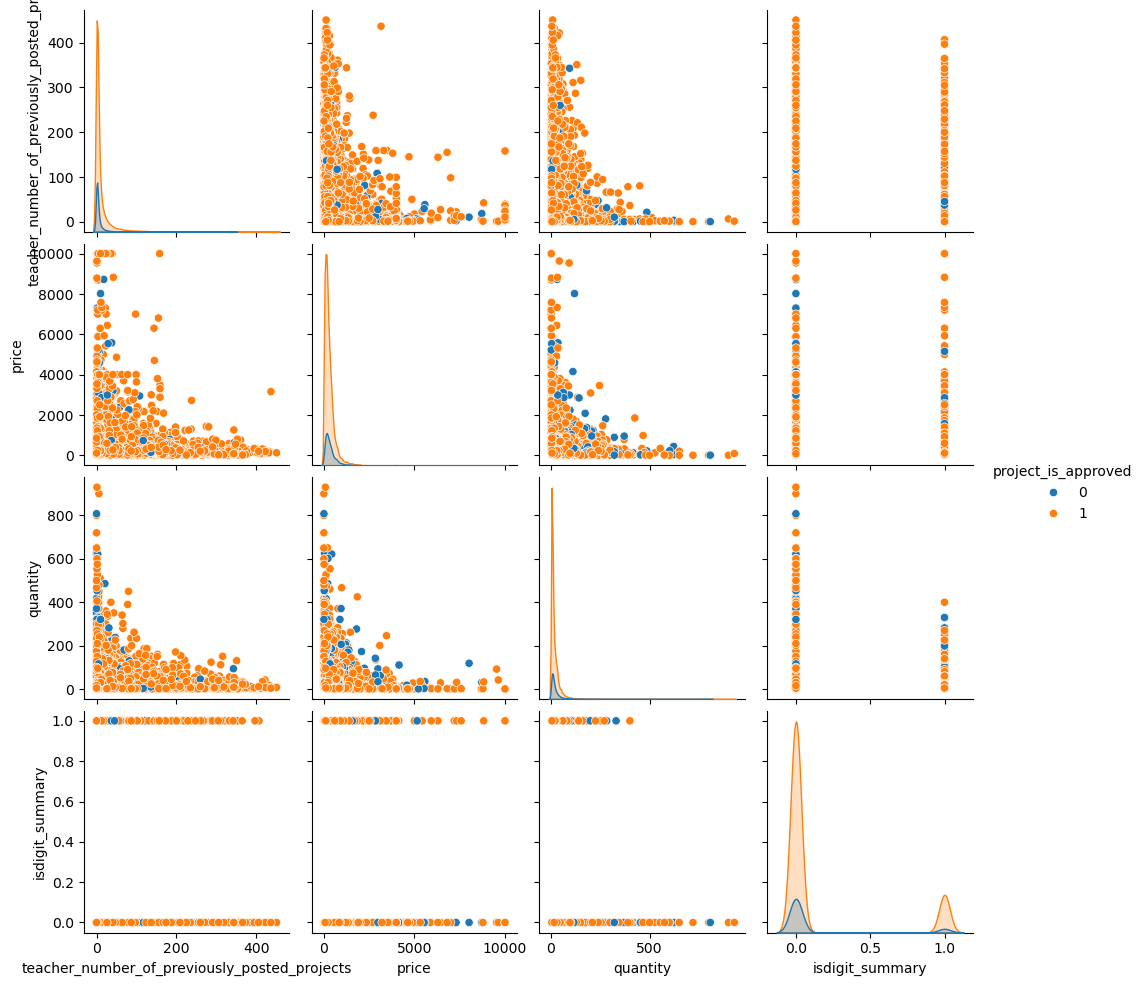

In [39]:
sns.pairplot(df[num_cols + ["project_is_approved"]], hue="project_is_approved")
plt.show()

Among all numeric features analyzed, project cost emerges as the strongest driver of approval: lower-cost projects are consistently more likely to be approved. Projects requesting fewer items also demonstrate higher approval likelihood. Teacher experience shows only a weak positive influence on approval, while the presence of numeric values in summaries has minimal effect. Overall, successful projects tend to be smaller in scale and cost, regardless of teacher experience

In [40]:
import plotly.io as pio
pio.renderers.default = "browser"


In [41]:
pip install -U plotly nbformat ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd

df['teacher_exp_group'] = pd.cut(
    df['teacher_number_of_previously_posted_projects'],
    bins=[-1, 0, 5, 20, df['teacher_number_of_previously_posted_projects'].max()],
    labels=['New', 'Low (1-5)', 'Medium (6-20)', 'High (20+)']
)


In [43]:

pd.pivot_table(
    df,
    values='project_is_approved',
    index='project_subject_categories',
    columns='teacher_exp_group',
    aggfunc='mean'
)

/var/folders/ck/z5x0f87n51g0pn_yrg4gyyp80000gn/T/ipykernel_6518/2840184198.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



teacher_exp_group                          New  Low (1-5)  Medium (6-20)  \
project_subject_categories                                                 
appliedlearning                       0.780890   0.807534       0.847114   
appliedlearning_health_sports         0.801047   0.794979       0.887755   
appliedlearning_history_civics        0.800000   0.815385       0.833333   
appliedlearning_literacy_language     0.866279   0.835476       0.858513   
appliedlearning_math_science          0.752688   0.804396       0.861111   
appliedlearning_music_arts            0.711864   0.829545       0.814371   
appliedlearning_specialneeds          0.777328   0.803704       0.845324   
appliedlearning_warmth_care_hunger    0.000000   1.000000       0.666667   
health_sports                         0.785069   0.827184       0.867082   
health_sports_appliedlearning         0.802632   0.853333       0.903226   
health_sports_history_civics          0.777778   0.894737       0.900000   
health_sports_literacy_language       0.840206   0.819315       0.867725   
health_sports_math_science            0.808219   0.786408       0.890625   
health_sports_music_arts              0.843750   0.800000       0.761905   
health_sports_specialneeds            0.880000   0.842014       0.881757   
health_sports_warmth_care_hunger      1.000000   0.900000       1.000000   
history_civics                        0.820513   0.829499       0.841040   
history_civics_appliedlearning        0.772727   0.857143       0.666667   
history_civics_health_sports          1.000000   0.857143       1.000000   
history_civics_literacy_language      0.860520   0.898551       0.922179   
history_civics_math_science           0.736842   0.897196       0.885714   
history_civics_music_arts             0.878788   0.801802       0.796875   
history_civics_specialneeds           0.784314   0.760870       0.820000   
history_civics_warmth_care_hunger          NaN   0.000000            NaN   
literacy_language                     0.846552   0.861289       0.884269   
literacy_language_appliedlearning     0.785714   0.878924       0.854167   
literacy_language_health_sports       0.750000   0.696970       0.928571   
literacy_language_history_civics      0.865385   0.873156       0.920863   
literacy_language_math_science        0.853664   0.863629       0.885280   
literacy_language_music_arts          0.760000   0.831731       0.846682   
literacy_language_specialneeds        0.818558   0.842867       0.893939   
literacy_language_warmth_care_hunger  0.750000   0.666667       1.000000   
math_science                          0.798583   0.807462       0.826391   
math_science_appliedlearning          0.803922   0.807786       0.878378   
math_science_health_sports            0.790000   0.735714       0.838095   
math_science_history_civics           0.830918   0.867647       0.865385   
math_science_literacy_language        0.809524   0.864111       0.875479   
math_science_music_arts               0.783607   0.818004       0.828010   
math_science_specialneeds             0.781853   0.817906       0.862069   
math_science_warmth_care_hunger       0.000000   0.333333       0.666667   
music_arts                            0.825444   0.847733       0.881308   
music_arts_appliedlearning            0.000000   1.000000       1.000000   
music_arts_health_sports              0.600000   1.000000       0.500000   
music_arts_history_civics             1.000000   0.500000       0.800000   
music_arts_specialneeds               0.739130   0.860000       0.973684   
music_arts_warmth_care_hunger              NaN        NaN       0.000000   
specialneeds                          0.793948   0.801574       0.846361   
specialneeds_health_sports            0.722222   0.800000       0.818182   
specialneeds_music_arts               0.714286   0.797619       0.812500   
specialneeds_warmth_care_hunger       0.777778   0.833333       0.000000   
warmth_care_hunger                    0.770833  

### Approval Rate by Subject and Teacher Experience

In [53]:
import plotly.express as px

grouped = df.groupby(
    ['project_subject_categories', 'teacher_exp_group']
)['project_is_approved'].mean().reset_index()

fig = px.bar(
    grouped,
    x='project_subject_categories',
    y='project_is_approved',
    color='teacher_exp_group',
    barmode='group',
    title='Approval Rate by Subject and Teacher Experience',
    labels={'project_is_approved':'Approval Rate'}
)

fig.show()


/var/folders/ck/z5x0f87n51g0pn_yrg4gyyp80000gn/T/ipykernel_6518/945295651.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

